# Create a simple NN with Keras

In [7]:
import sys
!conda install --yes --prefix {sys.prefix} pandas seaborn matplotlib numpy

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /home/door/anaconda3/envs/gpu-env

  added / updated specs:
    - matplotlib
    - numpy
    - pandas
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    matplotlib-3.3.2           |                0           6 KB  conda-forge
    matplotlib-base-3.3.2      |   py39h98787fa_1         6.7 MB  conda-forge
    numpy-1.19.5               |   py39hd249d9e_3         5.3 MB  conda-forge
    patsy-0.5.3                |     pyhd8ed1ab_0     

In [19]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

df.head()

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
df.columns

Index(['timespreg', 'gluctol', 'diaspb', 'triceps', 'insulin', 'massindex',
       'pedigree', 'age', 'target'],
      dtype='object')

In [21]:
#Print class frequencies through pandas 
print(df.groupby('target').size())

target
0    500
1    268
dtype: int64


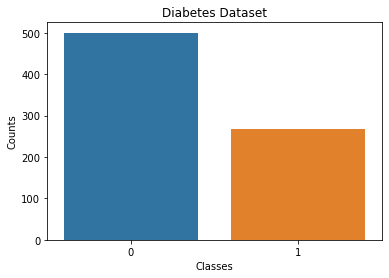

In [22]:
#Bar plot for the target variable
%matplotlib inline
import seaborn as sns #https://seaborn.pydata.org/
import matplotlib.pyplot as plt #https://matplotlib.org/

sns.countplot(x="target", data=df)
plt.title("Diabetes Dataset")
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.show()

array([[<AxesSubplot:title={'center':'timespreg'}>,
        <AxesSubplot:title={'center':'gluctol'}>,
        <AxesSubplot:title={'center':'diaspb'}>],
       [<AxesSubplot:title={'center':'triceps'}>,
        <AxesSubplot:title={'center':'insulin'}>,
        <AxesSubplot:title={'center':'massindex'}>],
       [<AxesSubplot:title={'center':'pedigree'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

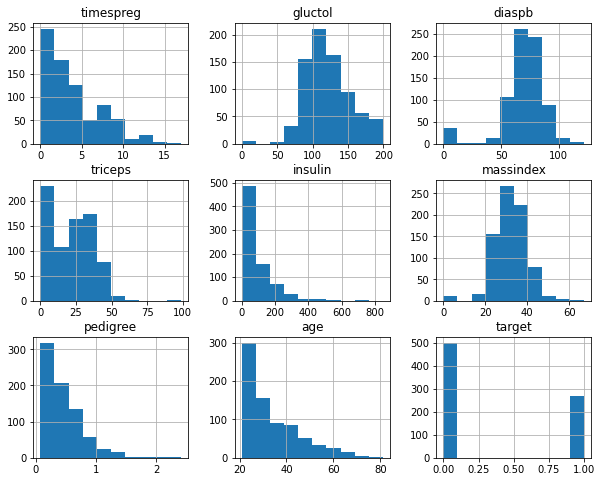

In [23]:
df.hist(figsize=(10,8))

In [24]:
# slicing the dataframe EXPL_VARs/TARGET
import numpy as np
df = df.values
x=df[:,0:-1] 
y=df[:,-1]

print(x.shape)

(768, 8)


In [25]:
print(y.shape)

(768,)


In [26]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size =0.3, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability
print(x_train.shape)
print(x_test.shape)

(537, 8)
(231, 8)


## Create a NN model with Keras

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers

np.random.seed(123)

model = Sequential()
model.add(Dense(10, input_dim=8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## Train the model and print a summary representation of the model

In [29]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                90        
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
None


# Fit the model

In [30]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100,
                    batch_size=32)

2023-03-14 18:33:24.538808: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
14/14 [==============================] - 2s 14ms/step - loss: 8.8842 - accuracy: 0.4872 - val_loss: 5.1272 - val_accuracy: 0.3981
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 7.4797 - accuracy: 0.4592 - val_loss: 3.6289 - val_accuracy: 0.3889
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 5.4993 - accuracy: 0.5431 - val_loss: 2.4835 - val_accuracy: 0.3981
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 5.1837 - accuracy: 0.5431 - val_loss: 2.1656 - val_accuracy: 0.3889
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 4.4340 - accuracy: 0.5105 - val_loss: 1.8268 - val_accuracy: 0.3889
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 3.7230 - accuracy: 0.5361 - val_loss: 1.7328 - val_accuracy: 0.3889
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 3.3192 - accuracy: 0.5198 - val_loss: 1.4654 - val_accuracy: 0.3796
Epoch 8/100


# Evaluate the model and print its loss and accuracy score

In [31]:
score = model.evaluate(x_test, y_test)
print(score)

8/8 [==============================] - 0s 1ms/step - loss: 0.6172 - accuracy: 0.6667
[0.6171624660491943, 0.6666666865348816]


In [32]:
y_pred_prob=model.predict(x_test)
y_pred_prob

array([[0.27292266],
       [0.2923746 ],
       [0.27247566],
       [0.3502508 ],
       [0.30952606],
       [0.30425563],
       [0.3057189 ],
       [0.27287906],
       [0.37205482],
       [0.3307403 ],
       [0.26877233],
       [0.3598322 ],
       [0.2886734 ],
       [0.26963106],
       [0.32960346],
       [0.3170939 ],
       [0.31189394],
       [0.27197856],
       [0.29744658],
       [0.28170305],
       [0.4295704 ],
       [0.27239123],
       [0.27855623],
       [0.27218515],
       [0.3763519 ],
       [0.38991863],
       [0.55054486],
       [0.27918956],
       [0.36331016],
       [0.44289297],
       [0.47165275],
       [0.3904914 ],
       [0.27149335],
       [0.32522205],
       [0.28343585],
       [0.2746733 ],
       [0.37549132],
       [0.46658984],
       [0.3044133 ],
       [0.47086507],
       [0.3370826 ],
       [0.27198175],
       [0.32581264],
       [0.5145087 ],
       [0.29363263],
       [0.40592003],
       [0.38333654],
       [0.349

              precision    recall  f1-score   support

         0.0       0.71      0.87      0.78       150
         1.0       0.59      0.36      0.45        81

    accuracy                           0.69       231
   macro avg       0.65      0.61      0.61       231
weighted avg       0.67      0.69      0.66       231



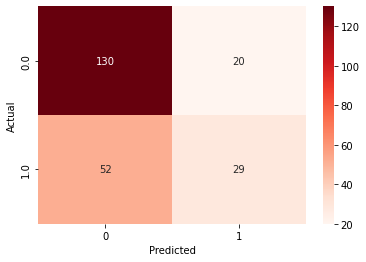

In [33]:
y_pred=np.where(y_pred_prob > .38, 1,0).flatten()

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn
import pandas as pd

print(classification_report(y_test, y_pred))

confusion_matrix = pd.crosstab( y_test,y_pred,rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,fmt='g',cmap="Reds")
plt.show()

# Plot model training history

In [34]:
history.history

{'loss': [8.884235382080078,
  7.4796528816223145,
  5.499293327331543,
  5.183652400970459,
  4.433985710144043,
  3.7230324745178223,
  3.3192176818847656,
  2.5043742656707764,
  2.35306453704834,
  2.306532859802246,
  1.945353388786316,
  1.6519211530685425,
  1.4625715017318726,
  1.2041720151901245,
  1.384574294090271,
  1.1231614351272583,
  1.0407488346099854,
  1.1811448335647583,
  0.9599128365516663,
  0.8308939933776855,
  0.86274254322052,
  0.7755932807922363,
  0.7821297645568848,
  0.7280650734901428,
  0.702798068523407,
  0.6578463315963745,
  0.6894501447677612,
  0.671970009803772,
  0.6886472105979919,
  0.6824979782104492,
  0.665604293346405,
  0.653985857963562,
  0.6634020209312439,
  0.6384711265563965,
  0.670935332775116,
  0.6482862830162048,
  0.6509605050086975,
  0.6468898057937622,
  0.6420884132385254,
  0.6665753126144409,
  0.6554886102676392,
  0.6336556077003479,
  0.6328130960464478,
  0.6546655893325806,
  0.6458228826522827,
  0.62005883455276

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


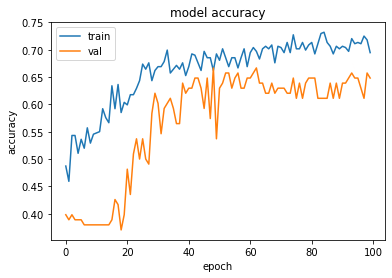

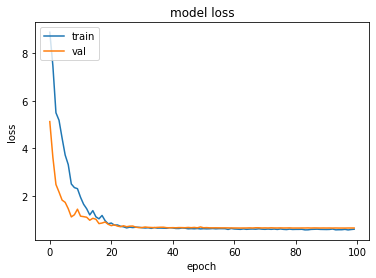

In [35]:
import matplotlib.pyplot as plt

%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()